________________________________________________________________________________________________________________________


* Yuvraj Sutar 
* yuvrajsutar009@gmail.com
_ _________________________________________________________________________________________________________________________
_  _________________________________________________________________________________________________________________________

In [1]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


- ## <font color = green> Data Preprocessing : </font>

In [2]:
# dum_df = pd.get_dummies(df)
# dum_df = dum_df.drop('Response_Not Bought', axis=1)
# dum_df

In [3]:

X = iris.iloc[:,0:4]
y = iris.iloc[:,4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=11)

X_train

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
120,6.9,3.2,5.7,2.3
122,7.7,2.8,6.7,2.0
49,5.0,3.3,1.4,0.2
29,4.7,3.2,1.6,0.2
...,...,...,...,...
76,6.8,2.8,4.8,1.4
13,4.3,3.0,1.1,0.1
81,5.5,2.4,3.7,1.0
91,6.1,3.0,4.6,1.4


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

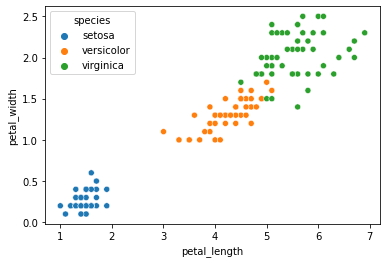

In [5]:
import seaborn as sns
sns.scatterplot(x='petal_length',y='petal_width',hue="species",data=iris) #rainbow #

- ### <font color = green> Splitting and Fitting The Data : </font>

In [6]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

knn

KNeighborsClassifier()

### MODEL FITTING

In [7]:
knn.fit( X_train, y_train )

KNeighborsClassifier()

### Model Prediction

In [8]:
y_pred = knn.predict(X_test)
y_pred

array(['virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype=object)

In [9]:
# y_test

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [11]:
1. 0.95
2. 0.90 best 

1)         act
  pred   95  0
         5   0
        
   sens: 95/95+5=0.95
    spec= 0/0=0

2)       act
 pred    85   0
          0   50
        
        sens= 85/85=1
        spec= 50/50=1

SyntaxError: invalid syntax (Temp/ipykernel_22244/279355411.py, line 1)

### Accuracy

In [44]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred)
print(c_m)
     
#          pred s     pred verg   pred vers

# act s     18         0              0

# act verg  0          15            0

# act vers  0           0            15

# 38/45=0.80

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


In [45]:
# act_pred["pred7"] = y_pred
# print(act_pred.head())

In [47]:
act_pred = pd.DataFrame({"actual":y_test,"pred1":y_pred})

- ## <font color = green> Confusion Matrix : </font>

- ### It is a performance measurement for machine learning classification problem where output can be two or more classes.
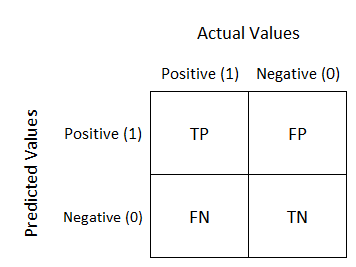
### True Positive:
> #### Interpretation: You predicted positive and it’s true.
### True Negative:
> #### Interpretation: You predicted negative and it’s true.
### False Positive: (Type 1 Error)
> #### Interpretation: You predicted positive and it’s false.
### False Negative: (Type 2 Error)
> #### Interpretation: You predicted negative and it’s false.

In [48]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
c_m[0,0]

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


9

- ## <font color = green> Classifiction Report : ( Precision and Recall )  </font>

- ### Recall:
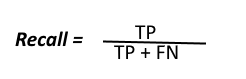
> ### Out of all the positive classes, how much we predicted correctly. It should be high as possible.

- ### Precision :
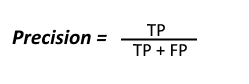
> ### Out of all the positive classes we have predicted correctly, how many are actually positive.
> ### Accuracy will be Out of all the classes, how much we predicted correctly,

- ### F1-Score :
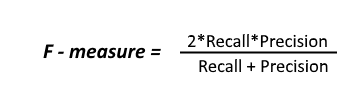
> ### It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



- ## <font color = green> Accuracy Score </font>

- ### The sum of true positives and true negatives divided by the total number of samples. This is only accurate if the model is balanced. It will give inaccurate results if there is a class imbalance.
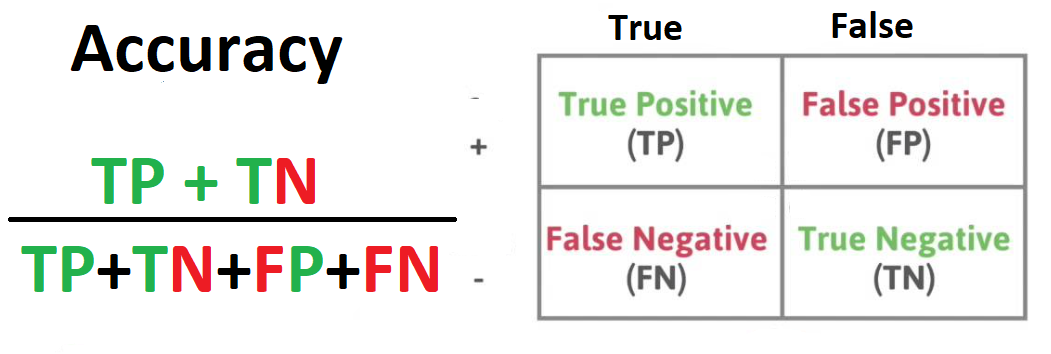

> ### The real problem arises, when the cost of misclassification of the minor class samples are very high. If we deal with a rare but fatal disease, the cost of failing to diagnose the disease of a sick person is much higher than the cost of sending a healthy person to more tests.

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9629629629629629


In [20]:
from sklearn.metrics import accuracy_score
import numpy as np

for i in range (1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit( X_train , y_train )
    y_pred = knn.predict(X_test)
    Accuracy_score = accuracy_score(y_test, y_pred)

    print("Accuracy when k is "+str(i)+" = ",Accuracy_score)

Accuracy when k is 1 =  0.97182531580755
Accuracy when k is 3 =  0.97182531580755
Accuracy when k is 5 =  0.9813067629253163
Accuracy when k is 7 =  0.9813067629253163
Accuracy when k is 9 =  0.9813067629253163
Accuracy when k is 11 =  0.9813067629253163
Accuracy when k is 13 =  0.9813067629253163
Accuracy when k is 15 =  0.9813067629253163


- ## <font color = green> Sensitivity :  </font>

- ### Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive). Sensitivity is also termed as Recall. This implies that there will be another proportion of actual positive cases, which would get predicted incorrectly as negative (and, thus, could also be termed as the false negative).
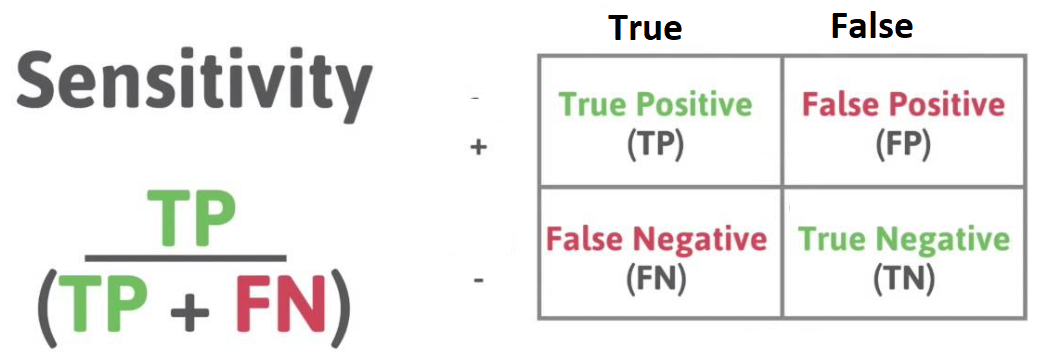

In [21]:
sensitivity1 = c_m[0,0]/(c_m[0,0]+c_m[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  1.0


In [24]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix


for i in range (1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit( X_train , y_train )
    y_pred = knn.predict(X_test)
    c_m = confusion_matrix(y_test, y_pred)
    print(c_m)
    #Accuracy_score = np.sqrt( accuracy_score(y_test, y_pred))
    sensitivity1 = c_m[0,0]/(c_m[0,0]+c_m[1,0])

    print("Sensitivity when k is "+str(i)+" = ",sensitivity1)

[[31  1]
 [ 2 20]]
Sensitivity when k is 1 =  0.9393939393939394
[[32  0]
 [ 3 19]]
Sensitivity when k is 3 =  0.9142857142857143
[[32  0]
 [ 2 20]]
Sensitivity when k is 5 =  0.9411764705882353
[[32  0]
 [ 2 20]]
Sensitivity when k is 7 =  0.9411764705882353
[[32  0]
 [ 2 20]]
Sensitivity when k is 9 =  0.9411764705882353
[[32  0]
 [ 2 20]]
Sensitivity when k is 11 =  0.9411764705882353
[[32  0]
 [ 2 20]]
Sensitivity when k is 13 =  0.9411764705882353
[[32  0]
 [ 2 20]]
Sensitivity when k is 15 =  0.9411764705882353


- ## <font color = green> Specificity :  </font>

- ### Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative). This implies that there will be another proportion of actual negative, which got predicted as positive and could be termed as false positives. This proportion could also be called a false positive rate.
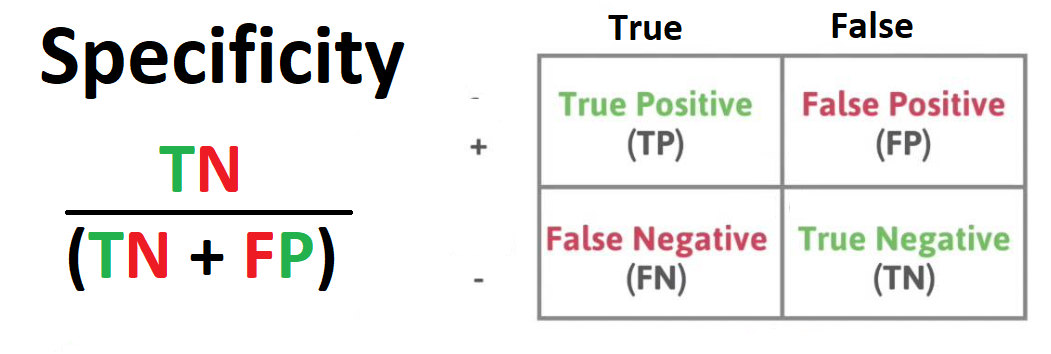

In [24]:
specificity1 = c_m[1,1]/(c_m[1,0]+c_m[1,1])
print('Specificity : ', specificity1)

Specificity :  0.9090909090909091


In [23]:
for i in range (1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit( X_train , y_train )
    y_pred = knn.predict(X_test)
    c_m = confusion_matrix(y_test, y_pred)
    #Accuracy_score = np.sqrt( accuracy_score(y_test, y_pred))
    Specificity1 = c_m[1,1]/(c_m[0,1]+c_m[1,1])

    print("Specificity1 when k is "+str(i)+" = ",Specificity1)

Specificity1 when k is 1 =  0.9523809523809523
Specificity1 when k is 3 =  1.0
Specificity1 when k is 5 =  1.0
Specificity1 when k is 7 =  1.0
Specificity1 when k is 9 =  1.0
Specificity1 when k is 11 =  1.0
Specificity1 when k is 13 =  1.0
Specificity1 when k is 15 =  1.0


- ### <font color = green> Plot ROC curve : </font>

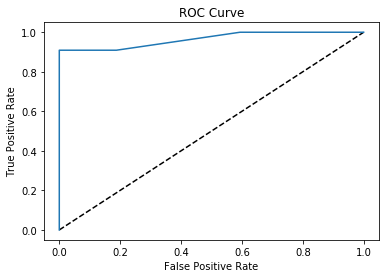

0.9644886363636364

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)
    

- ## <font color = red> Advantages of KNN Algorithm : </font>
> ### 1) It is simple to implement.
> ### 2) It is robust to the noisy training data
> ### 3) It can be more effective if the training data is large.
- ## <font color = red> Disadvantages of KNN Algorithm : </font>
> ### 1) Always needs to determine the value of K which may be complex some time.
> ### 2) The computation cost is high because of calculating the distance between the data points for all the training samples.

- ## <font color = red> Applications of KNN : </font>
- ### The following are some of the areas in which KNN can be applied successfully −

> ### <font color = green>1) Banking System - </font>
> #### KNN can be used in banking system to predict weather an individual is fit for loan approval? Does that individual have the characteristics similar to the defaulters one?

> ### <font color = green>2) Calculating Credit Ratings - </font>
> #### KNN algorithms can be used to find an individual’s credit rating by comparing with the persons having similar traits.

> ### <font color = green>3) Politics - </font>
> #### With the help of KNN algorithms, we can classify a potential voter into various classes like “Will Vote”, “Will not Vote”, “Will Vote to Party ‘Congress’, “Will Vote to Party ‘BJP’.

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import warnings
# warnings.filterwarnings('ignore')

#kfold = KFold(n_splits=5)
results = cross_val_score(knn, X, y, cv=9)
results

array([1.        , 0.94117647, 1.        , 0.94117647, 0.94117647,
       0.94117647, 0.9375    , 1.        , 1.        ])

In [8]:
import numpy as np
m1=np.mean([10000,20000,35000])
m1

21666.666666666668

In [9]:
import numpy as np
sd1=np.sqrt(np.var([10000,20000,35000]))
sd1

10274.023338281626

In [10]:
import numpy as np
e1=np.mean([12,24,36])
e1

24.0

In [11]:
import numpy as np
sd2=np.sqrt(np.var([12,24,36]))
sd2

9.797958971132712

In [12]:
(np.array([12,24,36])-e1)/sd2

array([-1.22474487,  0.        ,  1.22474487])

In [13]:
(np.array([10000,20000,35000])-m1)/sd1

array([-1.13554995, -0.16222142,  1.29777137])

In [14]:
import numpy as np
e2=np.mean([1,2,3])
e2

2.0

In [15]:
import numpy as np
sd3=np.sqrt(np.var([1,2,3]))
sd3

0.816496580927726

In [16]:
(np.array([1,2,3])-e2)/sd3

array([-1.22474487,  0.        ,  1.22474487])

In [19]:
[1,2,3]*2

[1, 2, 3, 1, 2, 3]

In [20]:
np.array([1,2,3])-2

array([-1,  0,  1])

________________________________________________________________________________________________________________________


* Yuvraj Sutar 
* yuvrajsutar009@gmail.com
_ _________________________________________________________________________________________________________________________
_  _________________________________________________________________________________________________________________________